In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1A. Choose 1 variable and plot it in 4 different ways

In [65]:
titanic = sns.load_dataset('titanic')
titanic.head()
print(titanic['pclass'].value_counts())

3    491
1    216
2    184
Name: pclass, dtype: int64


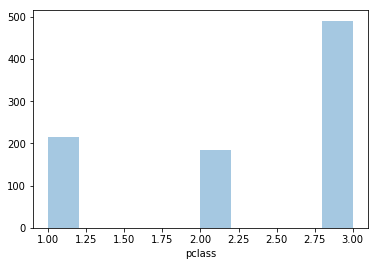

In [10]:
sns.distplot(titanic['pclass'], hist = True, kde=False)
plt.show()

# This graph shows the rough distribution of how many people were in what class.
# It's a good general summary but doesn't provide much detail about the population.

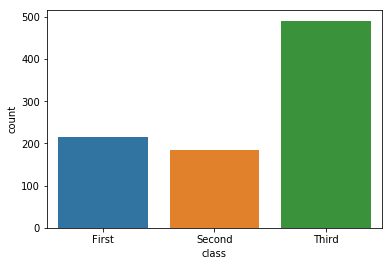

In [9]:
ax = sns.countplot(x="class", data=titanic)
# This is technically a different graph from above but essentially tells the same story.

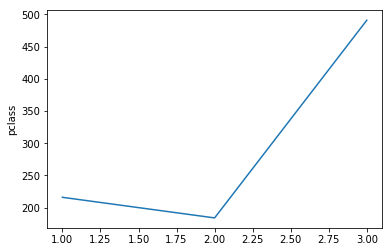

In [21]:
sns.lineplot(x=titanic['pclass'].unique(), y=titanic['pclass'].value_counts())
# Representing each number as a point can give a little definition in the graph. 
# However, the catagorical data with only 3 groups can be very limiting.

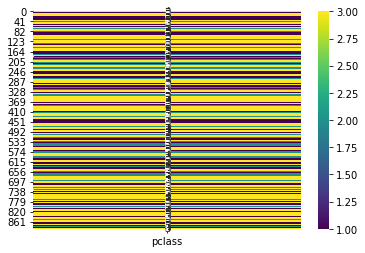

In [62]:
sns.heatmap(titanic['pclass'].to_frame(), annot=True, fmt="g", cmap='viridis')

plt.show()

# A heat map can graphically display an intuitive picture of the density around each value, however, 
# it's essentially nonsense when only working with a single variable that is catagorical. 

### 1B. Choose two continuous variables, and plot them three different ways.

In [76]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


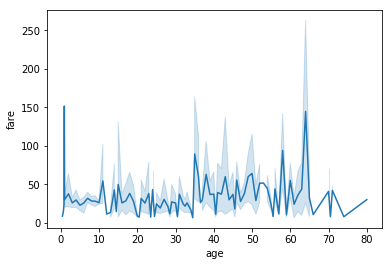

In [79]:
sns.lineplot(x=titanic['age'], y=titanic['fare'])

# In general, line plots can give good insight into the trends of continuous data. 
# One downside of line graphs is they can over simplify the data and can cause bad interpretations by missing outliers and 
# multiple dimensions of influences.

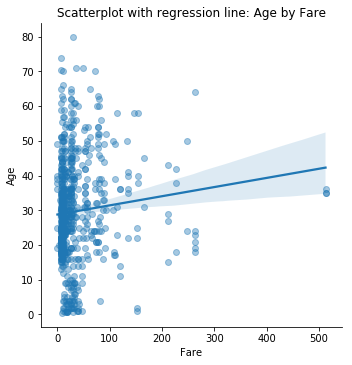

In [84]:
g = sns.lmplot(y='age', 
               x='fare',
               data=titanic, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Age")
g.set_xlabels("Fare")
plt.title('Scatterplot with regression line: Age by Fare')
plt.show()

# Scatter plots are essential tools to determining general trends in the data and identify potential relationships.
# They can also ID potential outliers and are easy tools to represent 3 layers of data.
# Clearly there's some clean up work to do on this based on the outliers.
# Scatter plots can be misleading when the interpreter doesn't quite understand different models of fit (linear, parabollic, etc.)

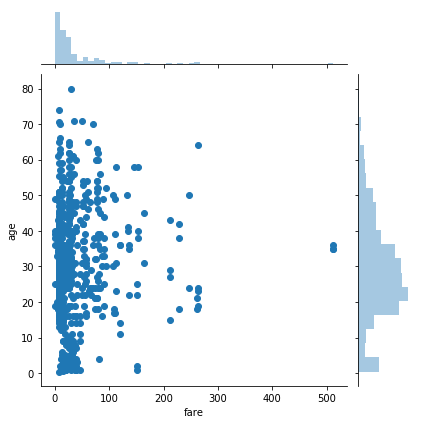

In [83]:
sns.jointplot(x='fare',y='age',data=titanic)

# Another use of scatter plots can also include density charts on the axis that can give some insight with more ease with tight
# clusters.
# Depending on the distribution of data along one of the axis, the scale can be skewed.

### 1C. Choose one continuous variable and one categorical variable, and plot them six different ways.

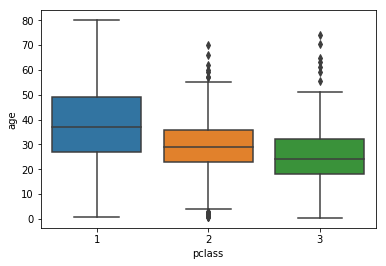

In [68]:
sns.boxplot(x='pclass',y='age',data=titanic)

# These plots are useful to display the general range of the data and point out outliers.
# However, the data scientist must be careful not to jump the gun and delete these outliers without thinking about the context.
# In this case, it could make sense that there were be a disproportionate amount of elderly people in first class, especially
# coming from London, and on the maiden voyage of the Titanic.

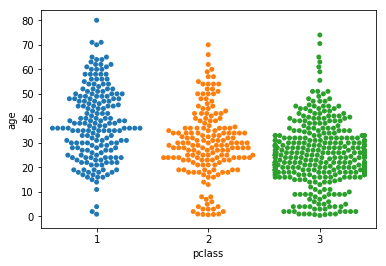

In [69]:
sns.swarmplot(x='pclass',y='age',data=titanic)

# These plots seem useful adding another layer of detail that could be missing from the typical box plots, as these are graphically
# displaying the range of data with respect to density.
# This plot seems to be more useful with limited catagorical values as the more that are introduced may result in over-crowding
# confusing display.

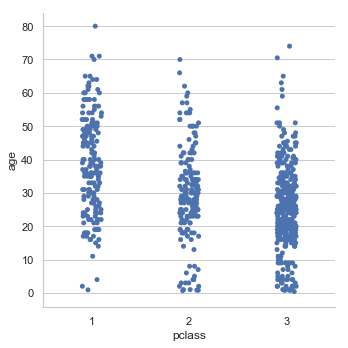

In [87]:
sns.catplot(x = 'pclass',y="age", data = titanic,color="b")

# Probably one of the simplest plots for the catagorical data, which isn't always a bad thing. Investors love simple and this one
# can tell similar stories as the others.
# However, this graph seems it could lose focus on detail and ID problems with the data.

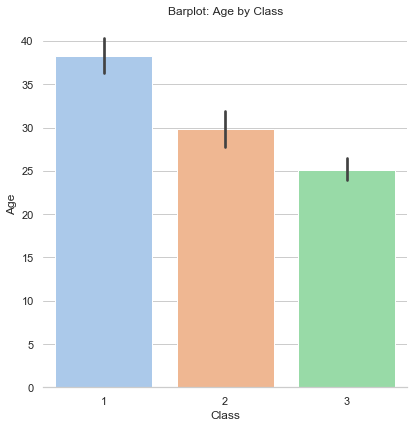

In [88]:
g = sns.catplot(x="pclass", y="age", data=titanic,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("Class")
plt.title('Barplot: Age by Class')
plt.show()

# Catplots (bar charts) are staples in the presentation world, especially when dealing with finance.
# A limitation of this plot is potential over crowding of columns if there are too many catagories. At that point, best to use
# a different plot.

C:\Users\trey.boardman\Documents\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


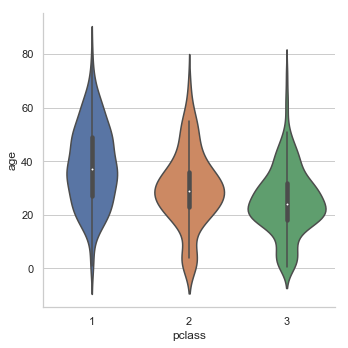

In [95]:
sns.factorplot(x="pclass", y="age", data=titanic, kind="violin", split=True)

# This is another data density plot that can be useful and is also a unique/clean way to look at things compared to box plots.
# We still may want to only use a limited number of catagories when dealing with these plots.
# Let's not ignore the fact that out of all of the other plots listed, so far, this is the only one that insinuates 
# a negative age, which on this scale, doesn't seem like this is referring to unborn children.

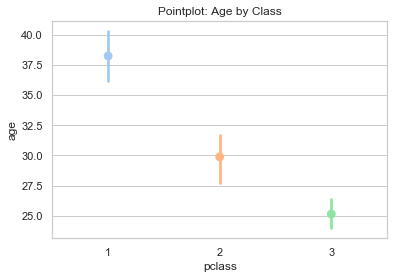

In [100]:
sns.set(style="whitegrid")

g = sns.pointplot(x="pclass", y="age", data=titanic,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: Age by Class')
plt.show()

# A benefit to this graph is that it tells the same information as a bar graph without deliberately needing to start from zero.
# This graph displays the range of continuous data in reference to each category.
# A downside to this graph is the data scientist can't rely much on this graph for QC.

## Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including: <br>
Probability distributions<br>
Bivariate relationships <br>
Whether the distributions or the relationships vary across groups<br>
Accompany your plot with a written description of what you see.

In [122]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [124]:
mpg.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


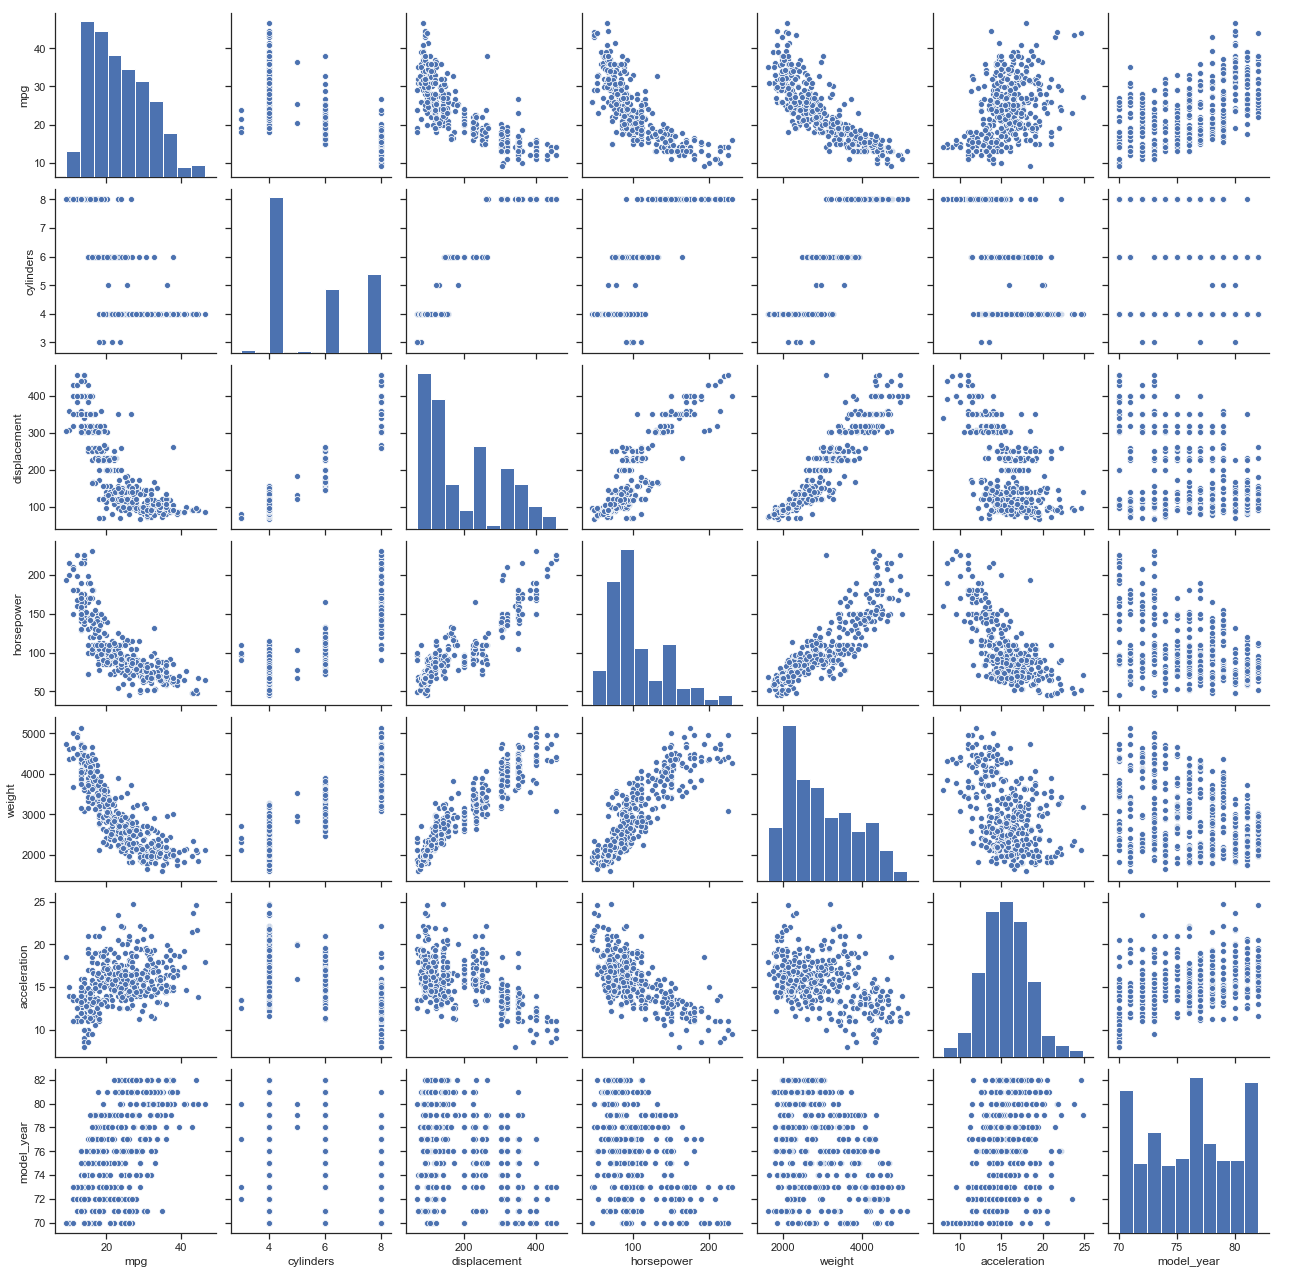

In [119]:
sns.set(style="ticks")

sns.pairplot(mpg)

This is a data set based on a selection of physical and performance attributes of some vehicles from the 70s and early 80s across multiple makes and models.
The general distribution of the data is roughly normal but tends to skew the to right. This could indicate basic physical descriptions that are typical for private-use vehicles; meaning, there aren't many vehicles lighter than 'X' or have mpg less than 'Y'.
One exception to the skew is the acceleration column, which seems to have a decent central tendancy where mean and median are relatively close compared to the other continuous variables.

On a high level, the catagorical variable (cylinders) compared with a few continuous variables (displacement, horsepower, and weight) indicate positive relationships. The narrative could suggest that heavier vehicles with more horsepower tend to have more cylinders, like trucks.
Conversely, these variables have a negative relationship with mph. This could suggest fuel efficiency is lower in vehicles with more power, heavier weight, and more cylinders. 
It appears that a general trend with high variability suggests that mpg increases with time. This is possibly due to increased regulations on car emissions and increased fuel efficiency. 
Weight seems to decrease over time, likely as function of lighter materials used to make vehicles.